## Plot How Clustered Genes are across samples

In [2]:
from hest import iter_hest
import squidpy as sq
import matplotlib.pyplot as plt

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
from hest import iter_hest
import matplotlib.pyplot as plt

ids = [f"MISC{i}" for i in range(1,13)]
ids 

['MISC1',
 'MISC2',
 'MISC3',
 'MISC4',
 'MISC5',
 'MISC6',
 'MISC7',
 'MISC8',
 'MISC9',
 'MISC10',
 'MISC11',
 'MISC12']

In [4]:
samples = iter_hest(hest_dir="../hest_data",id_list=ids)

In [13]:
sample = samples.__next__()
sample.adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mito
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,1,0.000216,0.000216,99.978420,1.0,0.693147,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,12,0.002590,0.002586,99.741044,12.0,2.564949,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AC233755.1,ENSG00000275063,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,4,0.000863,0.000863,99.913681,4.0,1.609438,False
AC213203.1,ENSG00000277475,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False


In [16]:
sq.gr.spatial_neighbors(sample.adata)
sq.gr.spatial_autocorr(
    sample.adata,
    mode="moran",
    n_perms=100,
    n_jobs=1,
)

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/scanpy/metrics/_common.py:72: UserWarning: 12449 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/scanpy/metrics/_common.py:72: UserWarning: 12449 variables were constant, will return nan for these.
  warnings.warn(


In [20]:
i_stat = sample.adata.uns['moranI'].dropna()
i_stat.head()

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
MBP,0.843458,0.0,0.000074,0.0,0.009901,0.000124,0.0,0.0,0.018834
PLP1,0.718052,0.0,0.000074,0.0,0.009901,0.000132,0.0,0.0,0.018834
SCGB2A2,0.668020,0.0,0.000074,0.0,0.009901,0.000156,0.0,0.0,0.018834
MT-CO1,0.665653,0.0,0.000074,0.0,0.009901,0.000141,0.0,0.0,0.018834
MT-CO2,0.653334,0.0,0.000074,0.0,0.009901,0.000124,0.0,0.0,0.018834


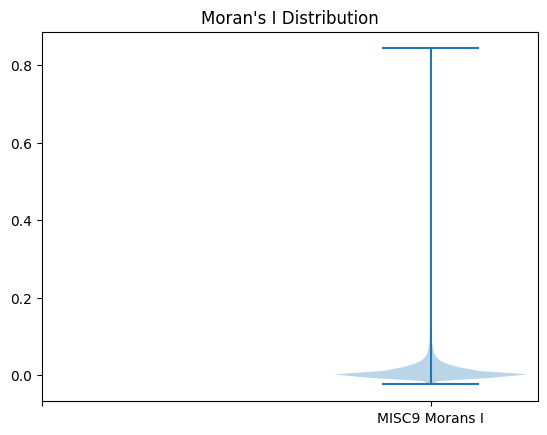

In [40]:
plt.violinplot(i_stat['I'])
plt.xticks(list(range(2)),labels=["", f"{sample.meta['id']} Morans I"])
plt.title("Moran's I Distribution")
plt.show()